In [ ]:
import numpy as np
from numpy.random import seed
from numpy.random import randint
from numpy import median
from numpy import prod
import matplotlib.pyplot as plt

In [ ]:
seed(1)
values = randint(0, 10, 100)
print("Array")
print(values)
print("Mediana")
print(median(values))

Array
[5 8 9 5 0 0 1 7 6 9 2 4 5 2 4 2 4 7 7 9 1 7 0 6 9 9 7 6 9 1 0 1 8 8 3 9 8
 7 3 6 5 1 9 3 4 8 1 4 0 3 9 2 0 4 9 2 7 7 9 8 6 9 3 7 7 4 5 9 3 6 8 0 2 7
 7 9 7 3 0 8 7 7 1 1 3 0 8 6 4 5 6 2 5 7 8 4 4 7 7 4]
Mediana
5.5


In [ ]:
def factorial(n):
  res = 1;
  if (n >= 0) and (type(n) == int):
    res = int(prod(range(1,n+1)))
    return res;
  else:
    print("No se puede calcular el factorial de "+str(n))
    print("El n° ingresado debe ser entero y mayor o igual que 0 (cero)")
    return None;

In [ ]:
factorial(5)

120

In [ ]:
def suma_de_serie(inicio, final):
  if inicio < final:
    if (type(inicio) == int) and (type(final) == int):
      return np.arange(inicio,final+1).sum()
    else:
      print("Los numeros deben ser enteros")
  else:
    print("El n° de inicio debe ser menor que el n° final")

In [ ]:
suma_de_serie(3,8)

33

**Carga del dataset**

In [ ]:
import pandas as pd

In [ ]:
df = pd.read_csv("Salarios Openqube - 2020.02.csv")
columna_necesaria = "Salario mensual NETO (en tu moneda local)"
df[columna_necesaria].head()

0     43000
1     63000
2    127000
3    102000
4    106000
Name: Salario mensual NETO (en tu moneda local), dtype: object

6415 filas y 81 columnas

In [ ]:
df.shape

(6415, 81)

La columna de salario neto tiene valores faltantes

In [ ]:
df[columna_necesaria].isnull().sum()

217

In [ ]:
def imputar_faltantes_por_valor_medio(dataset, columna):
  media = np.mean(dataset[columna])
  dataset[columna] = dataset[columna].fillna(media)

Ademas, los sueldos estan escritos como decimales en latino america, necesito modificarlos para operar con ellos

In [ ]:
def parse_float_latin_to_north_american_object(x):
  if type(x) == str:
    x = x.replace(".","*")
    x = x.replace(",",".")
    x = x.replace("*","")
  return x   

In [ ]:
parse_float_latin_to_north_american_object("123.564,89")

'123564.89'

Columna nueva "sueldo_neto", es el salario modificado y convertido en float

In [ ]:
df["sueldo_neto"] = df[columna_necesaria].apply(parse_float_latin_to_north_american_object)
df["sueldo_neto"] = df["sueldo_neto"].astype(float)

La distribucion del sueldo neto es una ley de potencias, quiere decir que puedo imputar los valores faltantes con la media sin alterar la distribucion

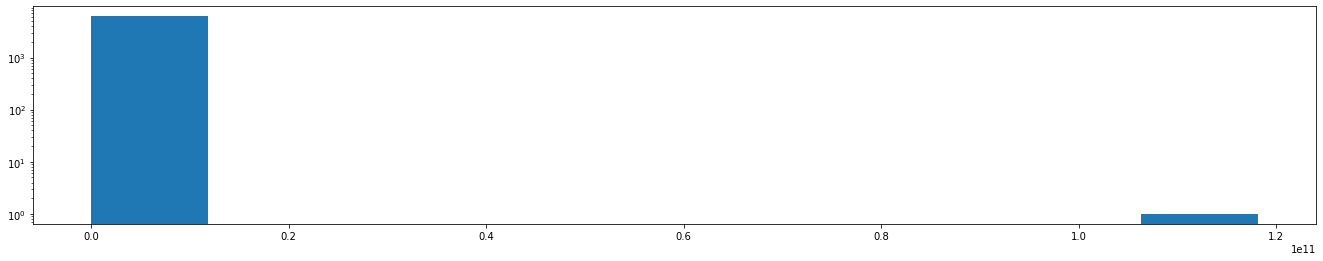

In [ ]:
plt.figure(figsize=(23,4))
plt.hist(df["sueldo_neto"].values,log=True)
plt.show()

In [ ]:
imputar_faltantes_por_valor_medio(df, "sueldo_neto")

Ya no hay faltantes

In [ ]:
df["sueldo_neto"].isnull().sum()

0

**Promedio**

In [ ]:
np.mean(df["sueldo_neto"])

19365379.357857414

**Mediana**

In [ ]:
np.median(df["sueldo_neto"])

80000.0

Parece que no hay ninguna relacion entre la media y la mediana